## CO2Emmision Predict

### import dataset

In [67]:
import csv

file = open('dataset/dataset_emmision.csv')
type(file)
csvreader = csv.reader(file)
header = []
header = next(csvreader)
header
rows = []
for row in csvreader:
    rows.append(row)

print(rows)

[['2', '4', '8,5', '196'], ['2,4', '4', '9,6', '221'], ['1,5', '4', '5,9', '136'], ['3,5', '6', '11,1', '255'], ['3,5', '6', '10,6', '244'], ['3,5', '6', '10', '230'], ['3,5', '6', '10,1', '232'], ['3,7', '6', '11,1', '255'], ['3,7', '6', '11,1', '267'], ['2,7', '4', '9,2', '?']]


### cleansing data

In [68]:
data_cleansing = []
for row in rows:
    if row[3] == '?':
        continue
    data_cleansing.append([float(row[0].replace(',','.')),float(row[3])])

### Data set visualization


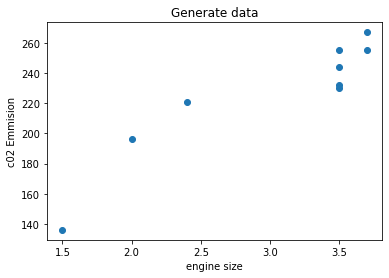

In [69]:
import matplotlib.pyplot as plt

x = []
y = []
for i in data_cleansing:
    x.append(i[0])
    y.append(i[1])

plt.scatter(x=x,y=y)
plt.title("Generate data")
plt.xlabel("engine size")
plt.ylabel("c02 Emmision")
plt.show()


### Menghitung konstanta
![konstanata](img/konstanta.png)

### Menghitung Koefiien Regresi
![koefisien_regresi](img/koef_regresi.png)

$y = \alpha + \beta x $

$ \alpha$ = konstanta 

$ \beta $ = koefisien regresi (besaran yang ditimbulkan $x$)

In [70]:
sigma_x = sum(x)
sigma_y = sum(y)
sigma_x_pangkat_2 = sum([i**2 for i in x])
sigma_y_pangkat_2 = sum([i**2 for i in y])
sigma_xy = sum([i[0]*i[1] for i in data_cleansing])


In [71]:
from researchzky.pearsonCorrelation import PearsonCorrelation

r = [PearsonCorrelation.pearson_def(x=x,y=y)]
r

[0.91966701395486]

In [72]:
class LinearRegresion():


    def konstanta(sigma_y,sigma_x,len,sigma_x_pangkat_2,sigma_xy):
        return  ((sigma_y*sigma_x_pangkat_2)-(sigma_x*sigma_xy))/((len*sigma_x_pangkat_2)-sigma_x**2)

    def koefisien_regresi (len,sigma_xy,sigma_x,sigma_y,sigma_x_pangkat_2):
        return (((len*sigma_xy)-(sigma_x*sigma_y)))/((len*sigma_x_pangkat_2)-sigma_x**2)

    def prediksi(a,b,x):
        y = a + b * x
        return print(f'jika x nya {x} maka prediksi y nya adalah {y}')

### result

In [73]:
a = LinearRegresion.konstanta(sigma_y=sigma_y,sigma_x=sigma_x,len=len(data_cleansing),sigma_x_pangkat_2=sigma_x_pangkat_2,sigma_xy=sigma_xy)
b = LinearRegresion.koefisien_regresi(len=len(data_cleansing),sigma_xy=sigma_xy,sigma_x=sigma_x,sigma_y=sigma_y,sigma_x_pangkat_2=sigma_x_pangkat_2)

LinearRegresion.prediksi(a=a,b=b,x=2.4)

jika x nya 2.4 maka prediksi y nya adalah 198.36539227399487


## with sklearn

In [74]:
import numpy as np

x = np.array(x)
y = np.array(y)

x


x = x.reshape(-1,1)
x

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7]])

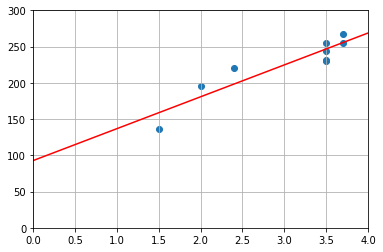

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

x_vis = np.array([0,4]).reshape(-1,1)

y_vis = model.predict(x_vis)

plt.scatter(x,y)
plt.plot(x_vis,y_vis,'-r')

# plt.title(label='Perbandingan kamera dan harga handphone')
# plt.xlabel('kamera')
# plt.ylabel('harga')
plt.xlim(0,4)
plt.ylim(0,300)
plt.grid(True)
plt.show()



In [76]:
x_vis = np.array([2]).reshape(-1,1)

y_vis = model.predict(x_vis)
y_vis

array([180.77160494])